In [1]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

**8.** This question involves the use of simple linear regression on the Auto data set.

**(a)** Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

**i.** Is there a relationship between the predictor and the response?

**ii.** How strong is the relationship between the predictor and the response?

**iii.** Is the relationship between the predictor and the response positive or negative?

**iv.** What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [2]:
auto = pd.read_csv('Data/Auto.csv', na_values='?')
auto = auto.dropna()

In [3]:
X = auto['horsepower']
y = auto['mpg']
# Fit the model
model = sm.OLS(y, X).fit()
##
# Print summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.649
Model:                            OLS   Adj. R-squared (uncentered):              0.648
Method:                 Least Squares   F-statistic:                              723.7
Date:                Wed, 29 Oct 2025   Prob (F-statistic):                    5.67e-91
Time:                        14:53:34   Log-Likelihood:                         -1608.1
No. Observations:                 392   AIC:                                      3218.
Df Residuals:                     391   BIC:                                      3222.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [4]:
## because our fit assumes no intercept, we need to add a constant term to fix the fit.
X = sm.add_constant(auto['horsepower'])
y = auto['mpg']
# Fit the model
model = sm.OLS(y, X).fit()
##
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           7.03e-81
Time:                        14:53:34   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

p-values is very small which means there is a relationship between horsepower and mpg.

R-squared is big enough to mean that there is a relationship (0.6), however not very strong. 

Negative bec coefficient is negative, -0.15. 

In [5]:
X_p = pd.DataFrame({'const': 1, 'horsepower': [98]})
predicted_mpg = model.predict(X_p)
print(predicted_mpg)
model.conf_int(alpha=0.05)

0    24.467077
dtype: float64


,0,1
const,38.525212,41.346510
horsepower,-0.170517,-0.145172


**(b)** Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

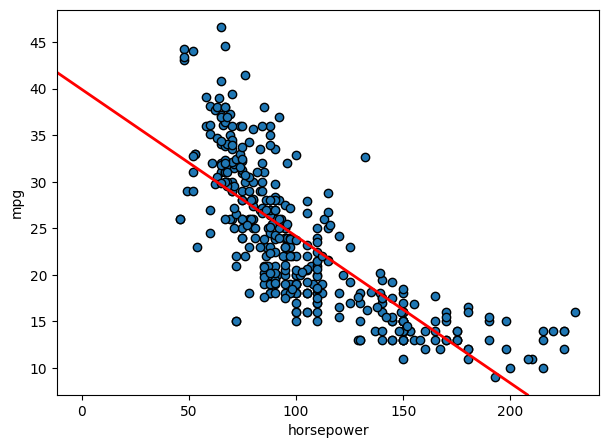

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(auto['horsepower'], auto['mpg'], edgecolor='k')
# coefficients from the fit
intercept = model.params['const']
slope = model.params['horsepower']
ax.axline((0, intercept), slope=slope, color='red', linewidth=2, label='mpg fit')
##
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
plt.show()

**(c)** Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

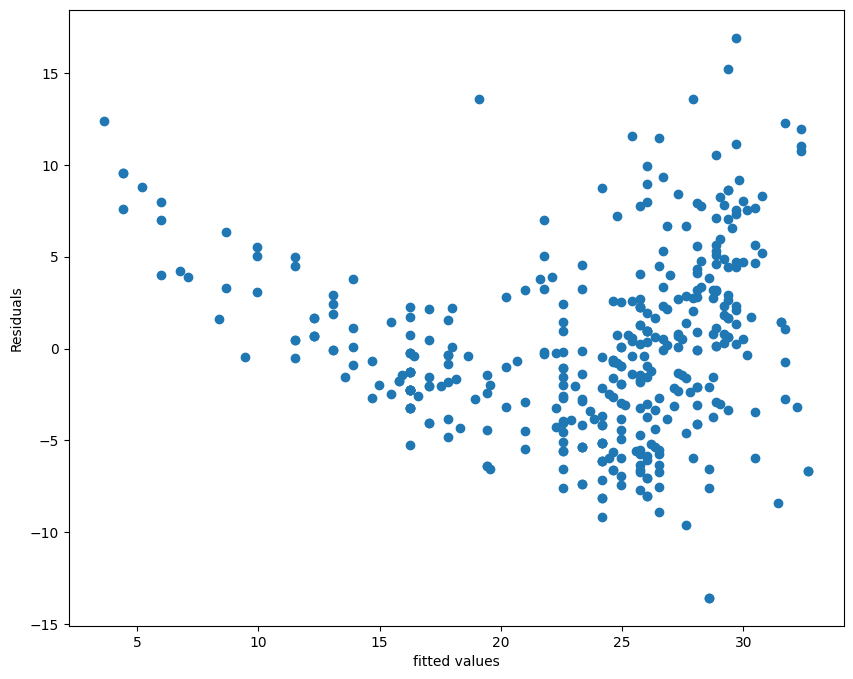

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(10,8))

axes.scatter(model.fittedvalues, model.resid)
# axes[0, 0].plot(model.fittedvalues, model.resid)
axes.set_ylabel('Residuals')
axes.set_xlabel('fitted values')
##
plt.show()

there is a u shape relation residuals, which tells us there is probably a quadratic correction to the model. 

**9.** This question involves the use of multiple linear regression on the Auto data set.

**(a)** Produce a scatterplot matrix which includes all of the variables in the data set.

<Figure size 1500x1000 with 0 Axes>

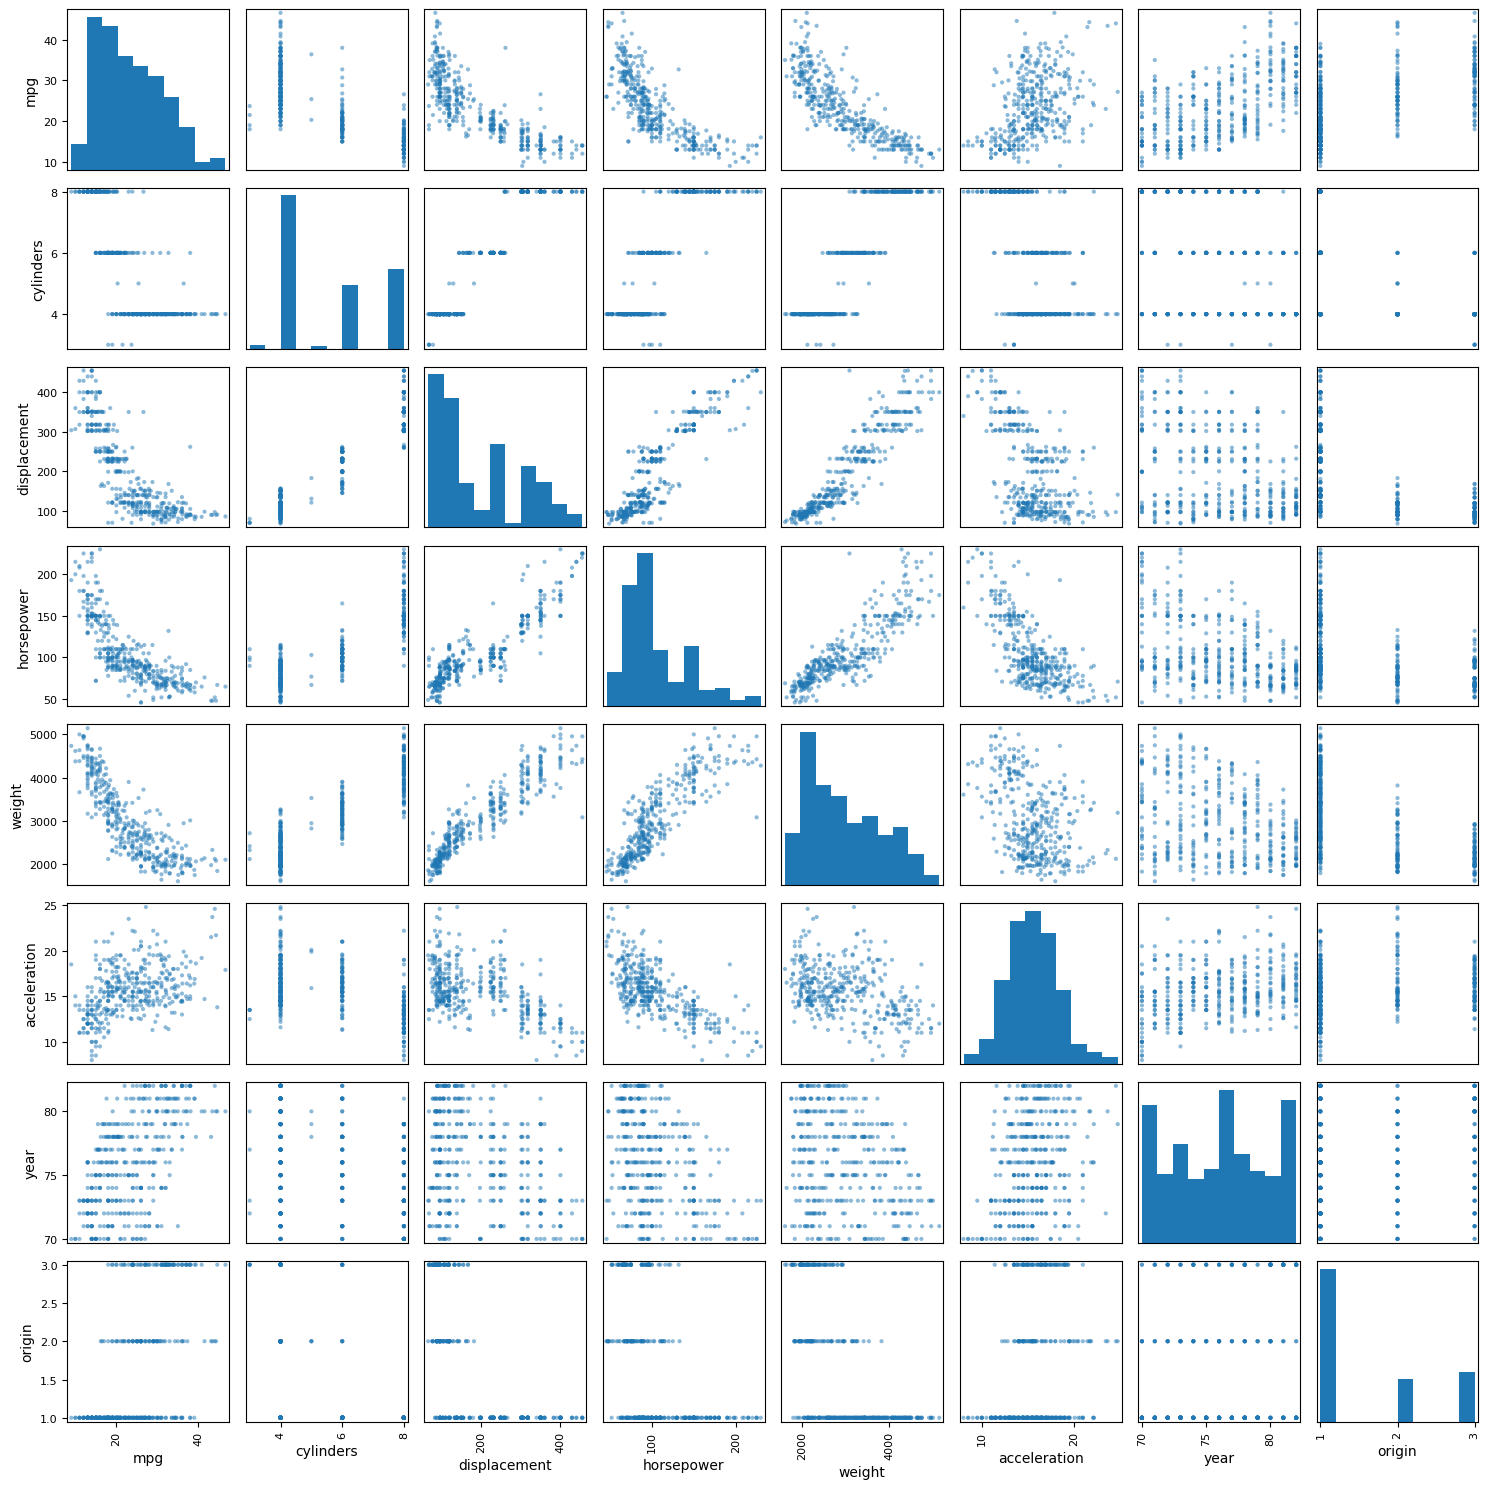

In [8]:
# Set up the figure size
plt.figure(figsize=(15, 10))
##
# Create scatter plots using pandas plotting scatter_matrix
pd.plotting.scatter_matrix(auto[['mpg',	'cylinders', 'displacement', 'horsepower', 'weight', \
    'acceleration',	'year', 'origin']], 
                         figsize=(15, 15),
                         diagonal='hist',  # Show histograms on diagonal
                         alpha=0.5)        # Set transparency
##
# Adjust layout and display
plt.tight_layout()
plt.show()

**(b)** Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [9]:
auto_no_str = auto.select_dtypes(exclude=['object','string'])
auto_no_str.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**(c)** Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

**i.** Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

**ii.** Which predictors appear to have a statistically significant relationship to the response?

**iii.** What does the coefficient for the year variable suggest?

In [10]:
## because our fit assumes no intercept, we need to add a constant term to fix the fit.
X = auto_no_str.drop(columns=['mpg'])
X = sm.add_constant(X)
y = auto['mpg']
# Fit the model
model = sm.OLS(y, X).fit()
##
# Print summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.04e-139
Time:                        14:53:37   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

The R-squared is 0.82, which tells us that there is a relationship between predictors and the mpg. 

Lower p-values are displacement, weigth, year and origin.

For year, positive coefficient means positive slope, so with the year mpg is increasing. 


**(d)** Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

/Users/mterzi/miniconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


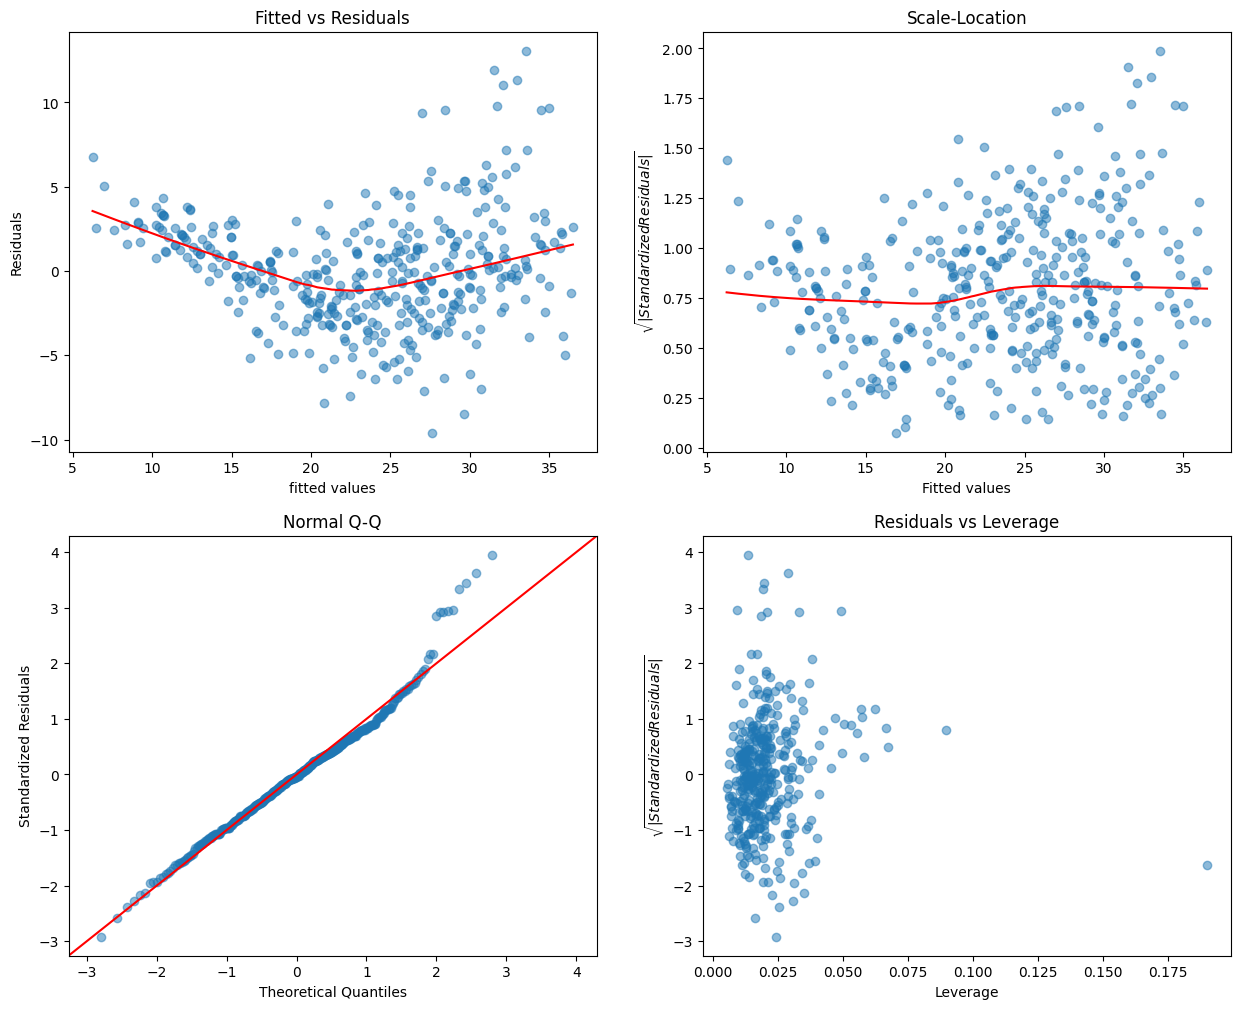

In [49]:
## initialize the plots
fig, axes = plt.subplots(2, 2, figsize=(15,12))
##
# Frist subplot: Fitted vs Residuals
x_res = model.fittedvalues
y_res = model.resid
ax1 = axes[0, 0]
ax1.scatter(x_res, y_res, alpha=0.5)
# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(y_res, x_res, frac=0.8)  # frac controls smoothness
ax1.plot(lowess[:, 0], lowess[:, 1], color='red')
##
ax1.set_title('Fitted vs Residuals')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('fitted values')
##
# Second subplot: QQ plot
ax2 = axes[1, 0]
from statsmodels.graphics.gofplots import ProbPlot
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
##
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax2)
#
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Standardized Residuals');
########
#
# Third subplot: Scale-Location
ax3 = axes[0, 1]
model_fitted_y = model.fittedvalues
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
ax3.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(model_norm_residuals_abs_sqrt, model_fitted_y, frac=0.8)  # frac controls smoothness
ax3.plot(lowess[:, 0], lowess[:, 1], color='red')
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$')
##
## Fourth subplot: Residuals vs Leverage
ax4 = axes[1, 1]
model_residuals = model.resid
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
##
ax4.scatter(model_leverage, model_norm_residuals, alpha=0.5)
ax4.set_title('Residuals vs Leverage')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('$\sqrt{|Standardized Residuals|}$')
#
plt.show()

There is a trend differet than a straight line which means model can be improved. Also there is a one high leverage point. 

**(e)** Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [56]:
from ISLP.models import ModelSpec as MS
## model 2
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', ('horsepower', 'weight')]).fit_transform(auto) 
X = sm.add_constant(X)
y = auto['mpg']
model2 = sm.OLS(y, X)
print(model2.fit().summary())
## model 3
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', ('horsepower', 'year')]).fit_transform(auto) 
X = sm.add_constant(X)
y = auto['mpg']
model3 = sm.OLS(y, X)
print(model3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     331.1
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.25e-158
Time:                        15:49:25   Log-Likelihood:                -978.81
No. Observations:                 392   AIC:                             1974.
Df Residuals:                     384   BIC:                             2005.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             5.7719      4.48

Horsepower*year has a significant coefficient and low p-value, horsepower*weight is not a significant interacttion because it has a low coefficient. 

**(f)** Try a few different transformations of the variables, such as $\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [64]:
from ISLP.models import poly
## model 4
X = MS(['cylinders', 'displacement', 'weight', 'acceleration', 'year', poly('horsepower', degree=2)]).fit_transform(auto) 
X = sm.add_constant(X)
y = auto['mpg']
model4 = sm.OLS(y, X)
print(model4.fit().summary())
## model 5
auto['log_horsepower'] = np.log(auto_no_str['horsepower'])
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'log_horsepower']).fit_transform(auto) 
X = sm.add_constant(X)
y = auto['mpg']
model4 = sm.OLS(y, X)
print(model4.fit().summary())
## model 6
auto['sqrt_horsepower'] = np.sqrt(auto_no_str['horsepower'])
X = MS(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'sqrt_horsepower']).fit_transform(auto) 
X = sm.add_constant(X)
y = auto['mpg']
model6 = sm.OLS(y, X)
print(model6.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 30 Oct 2025   Prob (F-statistic):          1.82e-153
Time:                        16:50:50   Log-Likelihood:                -990.37
No. Observations:                 392   AIC:                             1997.
Df Residuals:                     384   BIC:                             2029.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept     

**10.** This question should be answered using the Carseats data set.

In [75]:
Carseats = pd.read_csv('Data/Carseats.csv')
# auto = auto.dropna()
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


**(a)** Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [76]:
## because our fit assumes no intercept, we need to add a constant term to fix the fit.
Carseats['Urban_num'] = Carseats['Urban'].map({'Yes': 1, 'No': 0}).astype('int64')
Carseats['US_num'] = Carseats['US'].map({'Yes': 1, 'No': 0}).astype('int64')
X = Carseats[['Price', 'Urban_num', 'US_num']]
X = sm.add_constant(X)
y = Carseats['Sales']
# Fit the model
model_1 = sm.OLS(y, X).fit()
##
# Print summary
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.39e-23
Time:                        17:40:14   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

**(b)** Provide an interpretation of each coefficient in the model. Be careful some of the variables in the model are qualitative!

US cars have higher sales than others. However, p-value for Urban predictor is too high to interpret. Also, as expected, sales are increases with lower price, which can be seen by the negative coeficient. 

**(c)** Write out the model in equation form, being careful to handle the qualitative variables properly.

Becasue there are two qualitative variables with two values each, we have four conditions.  
$y = \beta_0 + \beta_1*$'Price', if 'Urban' = No and 'US' = No.  
$y = \beta_0 + \beta_1*$'Price' $+ \beta_2$, if 'Urban' = YES and 'US' = No.  
$y = \beta_0 + \beta_1*$'Price' $+ \beta_3$, if 'Urban' = No and 'US' = Yes.  
$y = \beta_0 + \beta_1*$'Price' $+ \beta_2 + \beta_3$, if 'Urban' = Yes and 'US' = Yes.  

**(d)** For which of the predictors can you reject the null hypothesis H0 :βj =0?

Urban p-value is too high, so its coefficient should be set to zero. 

**(e)** On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [77]:
## because our fit assumes no intercept, we need to add a constant term to fix the fit.
X = Carseats[['Price', 'US_num']]
X = sm.add_constant(X)
y = Carseats['Sales']
# Fit the model
model_2 = sm.OLS(y, X).fit()
##
# Print summary
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           2.66e-24
Time:                        17:40:24   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

**(f)** How well do the models in (a) and (e) fit the data?

Even though the model in (a) has more predictor, model in (e) fits as good as the model in (a). Becasuse of urban_num does not effect the result. 

**(g)** Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [78]:
confidence_intervals = model_2.conf_int()
print(confidence_intervals)

               0          1
const   11.79032  14.271265
Price   -0.06476  -0.044195
US_num   0.69152   1.707766


**(h)** Is there evidence of outliers or high leverage observations in the model from (e)?

we can check this by diagnostic plots

/Users/mterzi/miniconda3/lib/python3.11/site-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


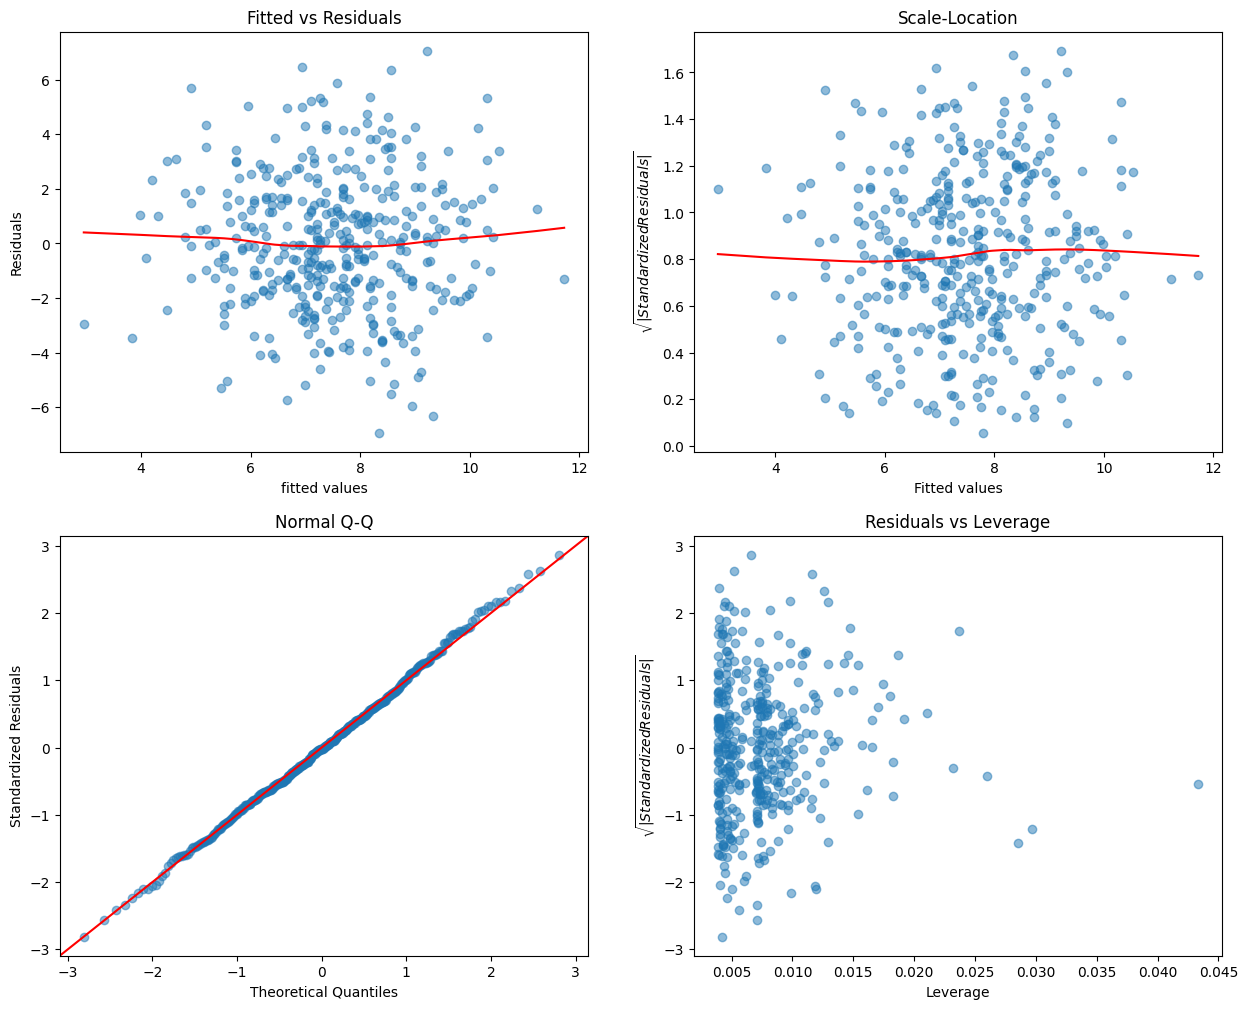

In [79]:
## initialize the plots
fig, axes = plt.subplots(2, 2, figsize=(15,12))
##
# Frist subplot: Fitted vs Residuals
x_res = model_2.fittedvalues
y_res = model_2.resid
ax1 = axes[0, 0]
ax1.scatter(x_res, y_res, alpha=0.5)
# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(y_res, x_res, frac=0.8)  # frac controls smoothness
ax1.plot(lowess[:, 0], lowess[:, 1], color='red')
##
ax1.set_title('Fitted vs Residuals')
ax1.set_ylabel('Residuals')
ax1.set_xlabel('fitted values')
##
# Second subplot: QQ plot
ax2 = axes[1, 0]
from statsmodels.graphics.gofplots import ProbPlot
# normalized residuals
model_norm_residuals = model_2.get_influence().resid_studentized_internal
##
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1, ax=ax2)
#
ax2.set_title('Normal Q-Q')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Standardized Residuals');
########
#
# Third subplot: Scale-Location
ax3 = axes[0, 1]
model_fitted_y = model_2.fittedvalues
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
ax3.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
# Apply LOWESS smoothing
lowess = sm.nonparametric.lowess(model_norm_residuals_abs_sqrt, model_fitted_y, frac=0.8)  # frac controls smoothness
ax3.plot(lowess[:, 0], lowess[:, 1], color='red')
ax3.set_title('Scale-Location')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('$\sqrt{|Standardized Residuals|}$')
##
## Fourth subplot: Residuals vs Leverage
ax4 = axes[1, 1]
model_residuals = model_2.resid
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
##
ax4.scatter(model_leverage, model_norm_residuals, alpha=0.5)
ax4.set_title('Residuals vs Leverage')
ax4.set_xlabel('Leverage')
ax4.set_ylabel('$\sqrt{|Standardized Residuals|}$')
#
plt.show()

There are no large outliers and and leverage.

**11.** In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [80]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

**(a)** Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [83]:
# fit the model without intercept
model = sm.OLS(y, x).fit()  # Note: x should not have constant column
## 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        15:40:35   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Small p-value suggest a relationship betweenn predictor and y.

**(b)** Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [84]:
# fit the model without intercept
model = sm.OLS(x, y).fit()  # Note: x should not have constant column
## 
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                    6.23e-31
Time:                        15:40:42   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(c) What is the relationship between the results obtained in (a) and (b)?

I expect to have coeficient between two models to be inverse of each other, 2 and 0.5 respectively. 

**(e)** Using the results from (d), argue that the t-statistic for the regression of y onto x is the same as the t-statistic for the regression of x onto y.

**12.** This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

When the denomiator in Eq. 3.28 does not change if we exchage the $x_i$ with $y_i$. 

**(b)** Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

We can use the data generated in previous question. 

(c) Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [88]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y_0 = x +0.3*rng.normal(size=100)
## calculate the coefficients for y to set sum of squares of both x ad y same.
a_sqr = np.sum(x**2) /np.sum(y_0**2)
y = y_0 * np.sqrt(a_sqr)
print(np.sum(x**2), np.sum(y**2))
##
# fit the model without intercept X onto Y
model = sm.OLS(x, y).fit()  # Note: x should not have constant column
## 
print(model.summary())
# fit the model without intercept Y onto X
model = sm.OLS(y, x).fit()  # Note: x should not have constant column
## 
print(model.summary())

73.05676144933012 73.05676144933012
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.890
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              800.9
Date:                Tue, 11 Nov 2025   Prob (F-statistic):                    3.02e-49
Time:                        10:38:18   Log-Likelihood:                         -15.841
No. Observations:                 100   AIC:                                      33.68
Df Residuals:                      99   BIC:                                      36.29
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

As we can see that the coefficients are the same. 

**13.** In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use the default random number generator with seed set to 1 prior to starting part (a) to ensure consistent results.

**(a)** Using the normal() method of your random number generator, create a vector, x, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

In [136]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)

**(b)** Using the normal() method, create a vector, eps, containing 100 observations drawn from a N(0,0.25) distribution—a normal distribution with mean zero and variance 0.25.

In [137]:
eps = rng.normal(0, 0.25, 100)

**(c)** Using x and eps, generate a vector y according to the model.  
$Y =−1+0.5X+\epsilon.$   
What is the length of the vector y? What are the values of β0 and β1 in this linear model?

In [138]:
y = -1 + 0.5 * x + eps
##
print('length of y is ', len(y))
print('β0 is -1 and β1 is 0.5')

length of y is  100
β0 is -1 and β1 is 0.5


**(d)** Create a scatterplot displaying the relationship between x and y. Comment on what you observe.

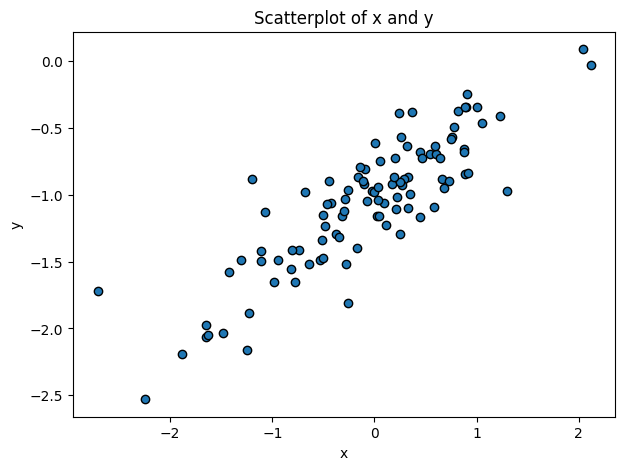

In [139]:
plt.figure(figsize=(7,5))
plt.scatter(x, y, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of x and y')
plt.show()

There is an obvious trend with slope ~0.5 and intersept ~ -1.

**(e)** Fit a least squares linear model to predict y using x. Comment on the model obtained. How do βˆ0 and βˆ1 compare to β0 and β1?

In [140]:
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.74e-30
Time:                        11:35:38   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x1             0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, both $\beta_0$ and $\beta_1$ are close to the theoretical values. 

**(f)** Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() method of the axes to create an appro- priate legend.

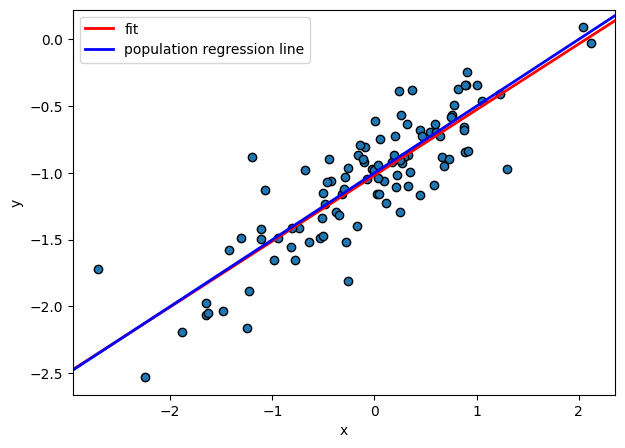

In [141]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y, edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
# coefficients from the fit
intercept = model.params[0]
slope = model.params[1]
ax.axline((0, intercept), slope=slope, color='red', linewidth=2, label='fit')
ax.axline((0, -1.0), slope=0.5, color='blue', linewidth=2, label='population regression line')
ax.legend()
plt.show()

**(g)** Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [142]:
x_sqr = x**2
# Combine x and x^2 into a design matrix
X = np.column_stack((x, x_sqr))
X = sm.add_constant(X)
## fit the model
model_x2 = sm.OLS(y, X).fit()
model_x2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.66e-29
Time:                        11:35:39   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0182      0.030    -34.186      0.000      -1.077      -0.959
x1             0.4916      0.032     15.562      0.000       0.429       0.554
x2            -0.0012      0.023     -0.052      0.959      -0.046       0.044
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The square term does not improve the fit, the R-squared term doesn't change.

**(h)** Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

In [143]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)
eps = rng.normal(0, 0.1, 100)
y = -1 + 0.5 * x + eps
##
print('length of y is ', len(y))
print('β0 is -1 and β1 is 0.5')
model_1 = sm.OLS(y, sm.add_constant(x)).fit()
model_1.summary()

length of y is  100
β0 is -1 and β1 is 0.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1784.
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.08e-64
Time:                        11:35:40   Log-Likelihood:                 89.198
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      98   BIC:                            -169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0076      0.010   -100.209      0.000      -1.028      -0.988
x1             0.4969      0.012     42.236      0.000       0.474       0.520
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

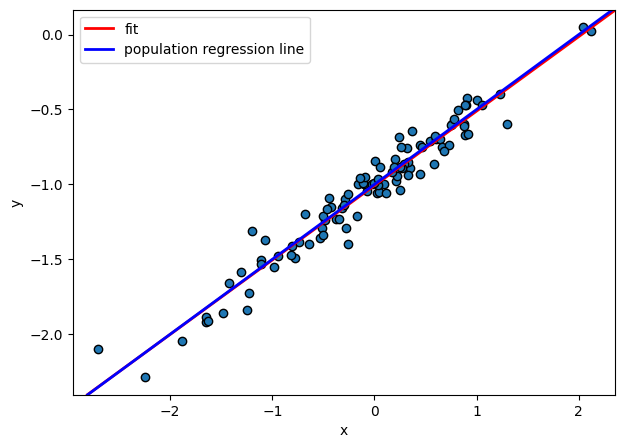

In [144]:
##
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y, edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
# coefficients from the fit
intercept = model_1.params[0]
slope = model_1.params[1]
ax.axline((0, intercept), slope=slope, color='red', linewidth=2, label='fit')
ax.axline((0, -1.0), slope=0.5, color='blue', linewidth=2, label='population regression line')
ax.legend()
plt.show()

This is definitely a better fit and improved aggrement with the population regretion line. 

**(i)** Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.

In [145]:
rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)
eps = rng.normal(0, 0.4, 100)
y = -1 + 0.5 * x + eps
##
print('length of y is ', len(y))
print('β0 is -1 and β1 is 0.5')
model_2 = sm.OLS(y, sm.add_constant(x)).fit()
model_2.summary()

length of y is  100
β0 is -1 and β1 is 0.5


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     107.3
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.02e-17
Time:                        11:35:42   Log-Likelihood:                -49.431
No. Observations:                 100   AIC:                             102.9
Df Residuals:                      98   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0304      0.040    -25.619      0.000      -1.110      -0.951
x1             0.4874      0.047     10.359      0.000       0.394       0.581
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

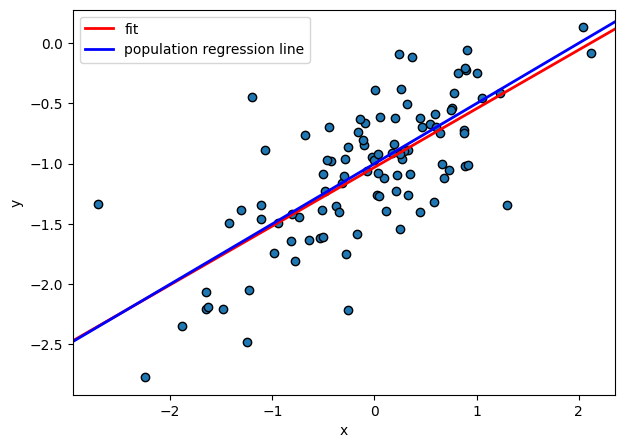

In [146]:
##
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y, edgecolor='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
# coefficients from the fit
intercept = model_2.params[0]
slope = model_2.params[1]
ax.axline((0, intercept), slope=slope, color='red', linewidth=2, label='fit')
ax.axline((0, -1.0), slope=0.5, color='blue', linewidth=2, label='population regression line')
ax.legend()
plt.show()

This is a poorer fit with lower R-squared value.

**(j)** What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [147]:
## initial model
confidence_intervals = model.conf_int()
print(confidence_intervals)
# less noisy model
confidence_intervals = model_1.conf_int()
print(confidence_intervals)
# more noisy model
confidence_intervals = model_2.conf_int()
print(confidence_intervals)

[[-1.06889099 -0.96912179]
 [ 0.43378268  0.55050833]]
[[-1.0275564  -0.98764871]
 [ 0.47351307  0.52020333]]
[[-1.11022559 -0.95059486]
 [ 0.39405229  0.58081333]]


Connfidence intervals increase with the noise, because chance of having a larger variance increases with the larger noise. 

**14.** This problem focuses on the collinearity problem.

**(a)** Perform the following commands in Python:

In [148]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?

$\beta_0 = 2$, $\beta_1 = 2$, and $\beta_2 = 0.3$

**(b)** What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.

In [155]:
# Create DataFrame
df = pd.DataFrame({
    'y': y,
    'x': x1,
    'x2': x2
})
print(df.corr())

           y         x        x2
y   1.000000  0.530531  0.471356
x   0.530531  1.000000  0.772324
x2  0.471356  0.772324  1.000000


<Figure size 500x300 with 0 Axes>

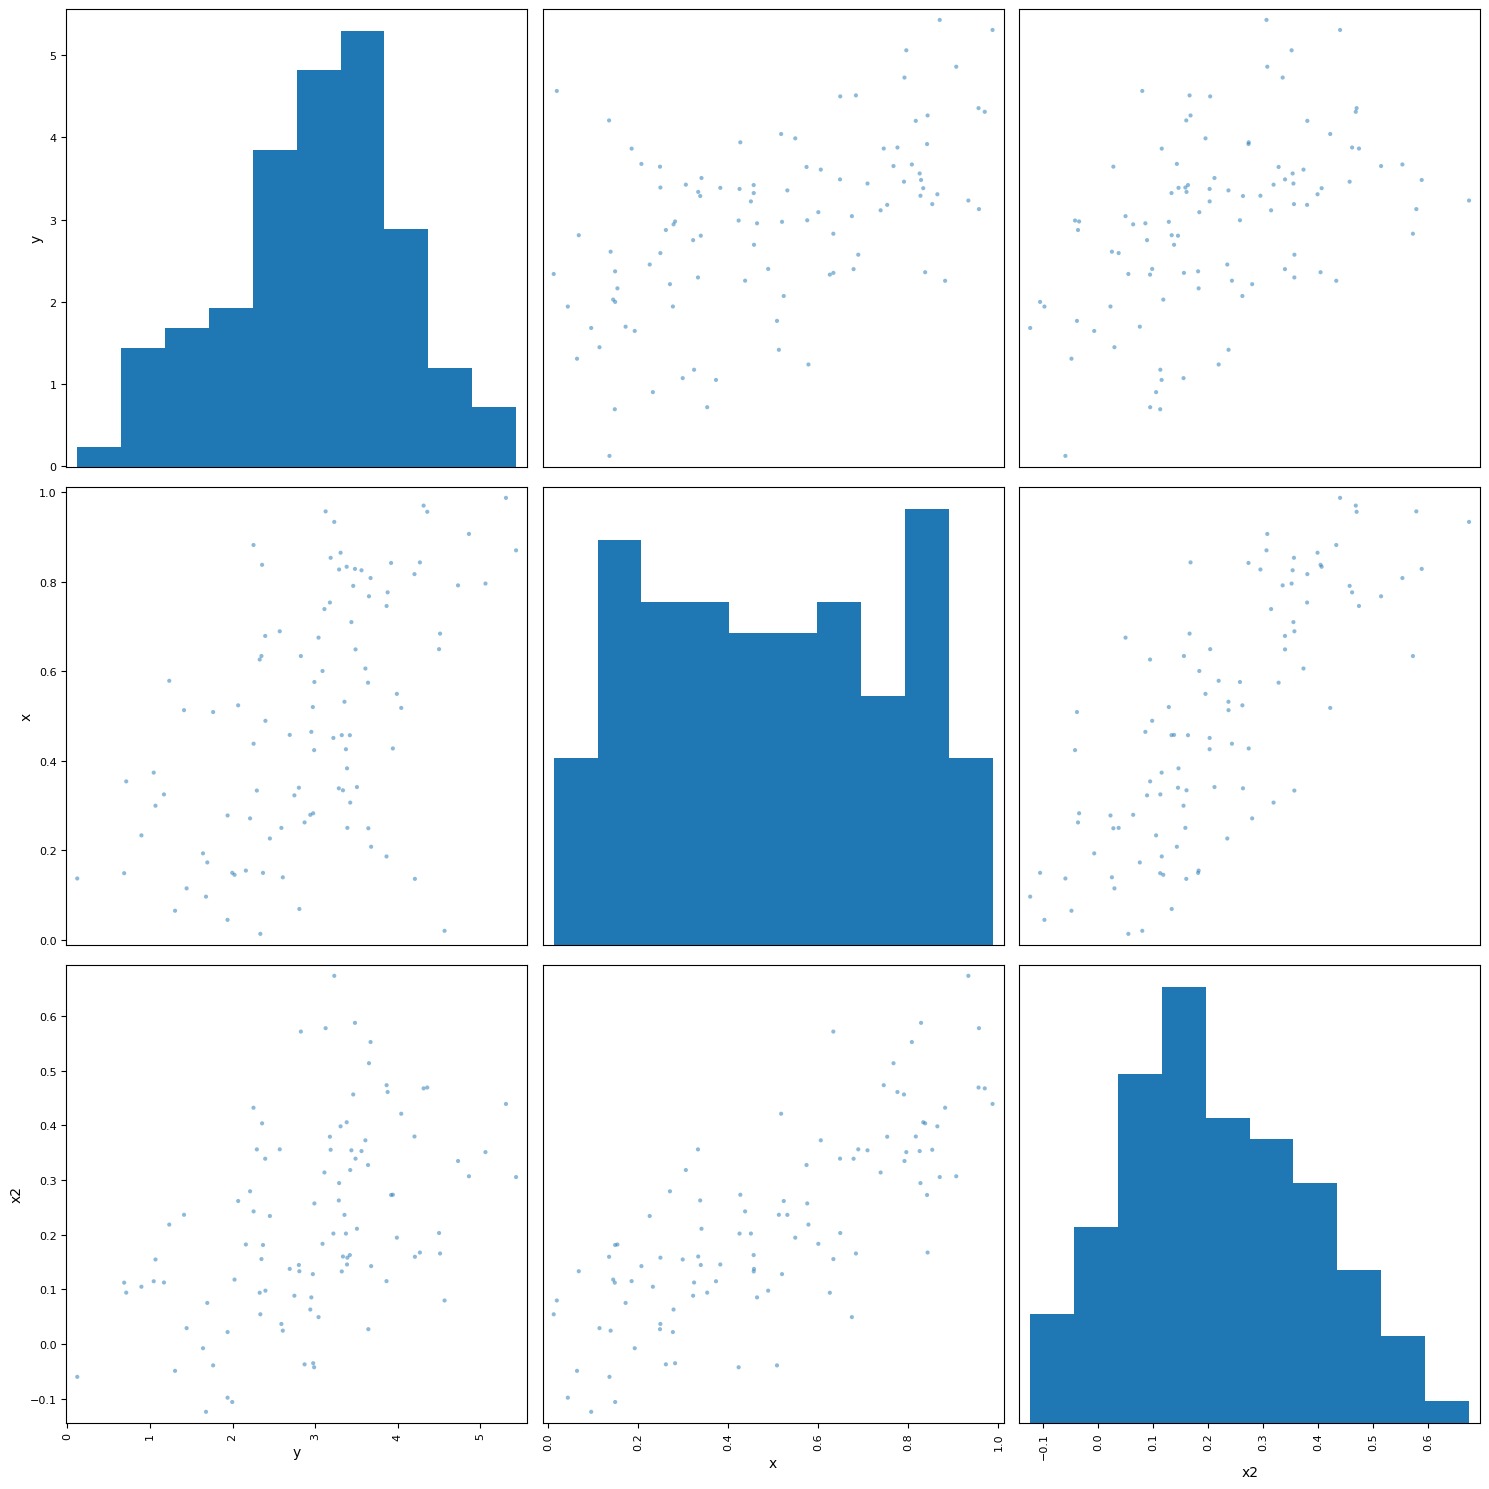

In [154]:
# Set up the figure size
plt.figure(figsize=(5, 3))
##
# Create scatter plots using pandas plotting scatter_matrix
pd.plotting.scatter_matrix(df[['y',	'x', 'x2']], 
                         figsize=(15, 15),
                         diagonal='hist',  # Show histograms on diagonal
                         alpha=0.5)        # Set transparency
##
# Adjust layout and display
plt.tight_layout()
plt.show()

**(c)** Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?

In [165]:
# Combine x1 and x2 into a design matrix
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
## fit the model
model_1 = sm.OLS(y, X).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           4.60e-08
Time:                        12:04:46   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const is close to the real vaule with low p value. $\beta_1$ is litte far from the real value but small p-value which suggest that the null hypothesis is false. $\beta_1$ value is three times the real value, with not small p-value which suggest us that model is not really working. 

**(d)** Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [166]:
# 
X = sm.add_constant(x1)
## fit the model
model_2 = sm.OLS(y, X).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           9.23e-07
Time:                        12:04:47   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The null hypothesis is definetly wrong and fit gives results close to the real values. 

**(e)** Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?

In [167]:
# 
X = sm.add_constant(x2)
## fit the model
model_3 = sm.OLS(y, X).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           3.13e-08
Time:                        12:04:47   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2840      0.151     15.088      0.000       1.984       2.584
x1             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

with a small p-value, the null hypothesis is wrong again!

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

These results do not contradict with each other. Becuase of the high correlation between two predictors, there is collinearity.

(g) Suppose we obtain one additional observation, which was unfortunately mismeasured. We use the function np.concatenate() to add this additional observation to each of x1, x2 and y.

In [168]:
x1 = np.concatenate([x1, [0.1]]) 
x2 = np.concatenate([x2, [0.8]]) 
y = np.concatenate([y, [6]]) 

Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

In [169]:
# Combine x1 and x2 into a design matrix
X = np.column_stack((x1, x2))
X = sm.add_constant(X)
## fit the model
model_1t = sm.OLS(y, X).fit()
model_1t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.92
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           6.60e-09
Time:                        12:04:54   Log-Likelihood:                -137.93
No. Observations:                 102   AIC:                             281.9
Df Residuals:                      99   BIC:                             289.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1121      0.193     10.952      0.000       1.729       2.495
x1             0.4907      0.429      1.145      0.255      -0.360       1.341
x2             2.9070      0.624      4.659      0.000       1.669       4.145
==============================================================================
Omnibus:                        0.912   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.903
Skew:                          -0.034   Prob(JB):                        0.637
Kurtosis:                       2.544   Cond. No.                         8.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
# 
X = sm.add_constant(x1)
## fit the model
model_2t = sm.OLS(y, X).fit()
model_2t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     19.99
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.05e-05
Time:                        12:04:54   Log-Likelihood:                -148.04
No. Observations:                 102   AIC:                             300.1
Df Residuals:                     100   BIC:                             305.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2027      0.211     10.450      0.000       1.785       2.621
x1             1.6868      0.377      4.471      0.000       0.938       2.435
==============================================================================
Omnibus:                       13.302   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.319
Skew:                           0.608   Prob(JB):                     6.38e-05
Kurtosis:                       4.752   Cond. No.                         4.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
# 
X = sm.add_constant(x2)
## fit the model
model_3t = sm.OLS(y, X).fit()
model_3t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     44.39
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           1.48e-09
Time:                        12:04:55   Log-Likelihood:                -138.60
No. Observations:                 102   AIC:                             281.2
Df Residuals:                     100   BIC:                             286.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2521      0.149     15.080      0.000       1.956       2.548
x1             3.3346      0.500      6.663      0.000       2.342       4.328
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.872
Skew:                          -0.056   Prob(JB):                        0.647
Kurtosis:                       2.561   Cond. No.                         5.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
print('Comparison of coefficients before and after adding the outlier:')
print('%.2f, %.2f' %(model_1.params[0], model_1t.params[0]))
print('%.2f, %.2f' %(model_1.params[1], model_1t.params[1]))
print('%.2f, %.2f' %(model_1.params[2], model_1t.params[2]))
print('%.2f, %.2f' %(model_2.params[0], model_2t.params[0]))
print('%.2f, %.2f' %(model_2.params[1], model_2t.params[1]))
print('%.2f, %.2f' %(model_3.params[0], model_3t.params[0]))
print('%.2f, %.2f' %(model_3.params[1], model_3t.params[1]))

Comparison of coefficients before and after adding the outlier:
2.06, 2.11
0.86, 0.49
2.27, 2.91
2.07, 2.20
1.88, 1.69
2.28, 2.25
3.15, 3.33


The additional outlier makes significant change in both intercept and slope. Change in the slopes means that this outlier have a high leverage. 

**15.** This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

**(a)** For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

In [177]:
Boston = pd.read_csv('Data/Boston.csv', na_values='?')
Boston = Boston.dropna()
Boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [206]:
# ## list of predictors
y = Boston.columns[1]
num_predictor = len(Boston.columns) - 2
rc_uni = np.zeros(num_predictor)
for ind in range(num_predictor):
    name_x = Boston.columns[ind+2]
    X = sm.add_constant(Boston[name_x])
    model_i = sm.OLS(Boston[y], X).fit()
    print('Summary for predictor %s:' %name_x)
    intercept_i = model_i.params.iloc[0]
    slope_i = model_i.params.iloc[1]
    p_value_i = model_i.pvalues.iloc[1]
    R_squared_i = model_i.rsquared 
    print('itercept: %.2f, slope: %.2f, p-value: %.3f, R-squared: %.3f' %(intercept_i, slope_i, p_value_i, R_squared_i))
    #
    rc_uni[ind] = slope_i
    

Summary for predictor zn:
itercept: 4.45, slope: -0.07, p-value: 0.000, R-squared: 0.040
Summary for predictor indus:
itercept: -2.06, slope: 0.51, p-value: 0.000, R-squared: 0.165
Summary for predictor chas:
itercept: 3.74, slope: -1.89, p-value: 0.209, R-squared: 0.003
Summary for predictor nox:
itercept: -13.72, slope: 31.25, p-value: 0.000, R-squared: 0.177
Summary for predictor rm:
itercept: 20.48, slope: -2.68, p-value: 0.000, R-squared: 0.048
Summary for predictor age:
itercept: -3.78, slope: 0.11, p-value: 0.000, R-squared: 0.124
Summary for predictor dis:
itercept: 9.50, slope: -1.55, p-value: 0.000, R-squared: 0.144
Summary for predictor rad:
itercept: -2.29, slope: 0.62, p-value: 0.000, R-squared: 0.391
Summary for predictor tax:
itercept: -8.53, slope: 0.03, p-value: 0.000, R-squared: 0.340
Summary for predictor ptratio:
itercept: -17.65, slope: 1.15, p-value: 0.000, R-squared: 0.084
Summary for predictor lstat:
itercept: -3.33, slope: 0.55, p-value: 0.000, R-squared: 0.208

All the predictors has very small p-value except 'chas'. 

**(b)** Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [207]:
X = Boston[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'medv']]
#
X = sm.add_constant(X)
y = Boston['crim']
# Fit the model
model_b = sm.OLS(y, X).fit()
##
# Print summary
print(model_b.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.03e-56
Time:                        12:45:15   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7784      7.082      1.946      0.0

If we choose the p-value<0.05, then the predictors with fals null hypothesis are 'zn', 'dis', 'rad', and 'medv'.

**(c)** How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

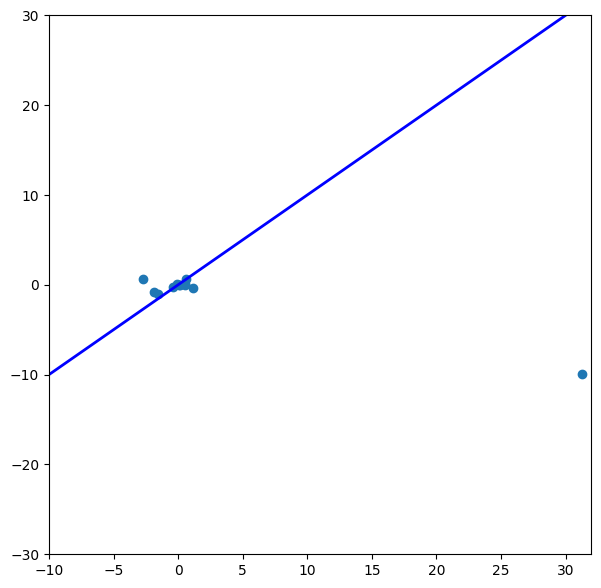

In [220]:
y = model_b.params.iloc[1:]
plt.figure(figsize=(7,7))
plt.scatter(rc_uni, y)
plt.axline((0, 0.0), slope=1.0, color='blue', linewidth=2)
plt.xlim(-10, 32)
plt.ylim(-30, 30)
plt.show()

All coeficient aggree in a reasonable margin with multiple and sigle predictor model, except the 'nox'.

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form  
$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$.

In [226]:
from ISLP.models import poly
# ## list of predictors
y = Boston.columns[1]
num_predictor = len(Boston.columns) - 2
rc_uni = np.zeros(num_predictor)
for ind in range(num_predictor-2):
    name_x = Boston.columns[ind+2]
    x1 = Boston[name_x]
    # Boston['sqr'] = x1**2
    # Boston['cube'] = x1**3
    X = MS([name_x,  poly(name_x, degree=2), poly(name_x, degree=3)]).fit_transform(auto) 
    X = sm.add_constant(X)
    model_i = sm.OLS(Boston[y], X).fit()
    print('Summary for predictor %s:' %name_x)
    intercept_i = model_i.params.iloc[0]
    slope_i = model_i.params.iloc[1]
    p_value_i = model_i.pvalues.iloc[1]
    R_squared_i = model_i.rsquared 
    print('intercept: %.2f, R-squared: %.3f' %(intercept_i, R_squared_i))
    print('slope: %.2f, p-value: %.3f' %(slope_i, p_value_i))
    slope_i = model_i.params.iloc[2]
    p_value_i = model_i.pvalues.iloc[2]
    print('slope: %.2f, p-value: %.3f' %(slope_i, p_value_i))
    slope_i = model_i.params.iloc[3]
    p_value_i = model_i.pvalues.iloc[3]
    print('slope: %.2f, p-value: %.3f' %(slope_i, p_value_i))
    #
    rc_uni[ind] = slope_i
    
    

Summary for predictor zn:
intercept: 4.45, R-squared: 0.058
slope: -0.07, p-value: 0.000
slope: -0.10, p-value: 0.000
slope: 11.97, p-value: 0.004
Summary for predictor indus:
intercept: -2.04, R-squared: 0.260
slope: 0.51, p-value: 0.000
slope: 0.15, p-value: 0.001
slope: -12.20, p-value: 0.001
Summary for predictor chas:
intercept: 3.60, R-squared: 0.003
slope: -0.18, p-value: 0.453
slope: -0.08, p-value: 0.080
slope: -0.73, p-value: 0.006
Summary for predictor nox:
intercept: -9.13, R-squared: 0.297
slope: 22.98, p-value: 0.000
slope: 10.77, p-value: 0.000
slope: -14.41, p-value: 0.000
Summary for predictor rm:
intercept: 15.48, R-squared: 0.068
slope: -1.89, p-value: 0.000
slope: -6.28, p-value: 0.000
slope: 13.29, p-value: 0.002
Summary for predictor age:
intercept: -3.69, R-squared: 0.174
slope: 0.11, p-value: 0.000
slope: 0.40, p-value: 0.000
slope: 18.74, p-value: 0.000
Summary for predictor dis:
intercept: 9.37, R-squared: 0.278
slope: -1.52, p-value: 0.000
slope: -0.78, p-val

Some of the non-linear terms have low p-value, which suggest a non-linear relationship in the model. 